<a href="https://colab.research.google.com/github/Rohithkr02/rohithkr2002projects/blob/main/spamnlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df_train=pd.read_csv('/content/drive/MyDrive/dataset/SMS_train.csv',encoding='ISO-8859-1')
df_test=pd.read_csv('/content/drive/MyDrive/dataset/SMS_test.csv',encoding='ISO-8859-1')

In [ ]:
df=pd.concat([df_train,df_test],ignore_index=True,axis=0)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df.drop(['S. No.'],inplace=True,axis=1)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df.isna().sum()

Message_body    0
Label           0
dtype: int64

In [ ]:
df['Label'].unique()

array(['Non-Spam', 'Spam'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


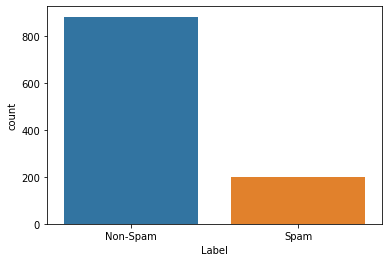

In [ ]:
import seaborn as sns
sns.countplot('Label',data=df)

In [ ]:
df['Label']=df['Label'].map({'Non-Spam':0,'Spam':1})
df

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
1078,Try to do something dear. You read something f...,0
1079,Sun ah... Thk mayb can if dun have anythin on....,0
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",0


In [ ]:
message=df.Message_body
message

0                              Rofl. Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity, * was in mood for that. So...any other s...
3                    Will ü b going to esplanade fr home?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear. You read something f...
1079    Sun ah... Thk mayb can if dun have anythin on....
1080    SYMPTOMS when U are in love: "1.U like listeni...
1081    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [ ]:
message=message.str.replace('[^a-zA-z0-9]+',' ')
message

<ipython-input-44-4ec2b42cb643>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  message=message.str.replace('[^a-zA-z0-9]+',' ')


0                               Rofl Its true to its name
1       The guy did some bitching but I acted like i d...
2       Pity was in mood for that So any other suggest...
3                      Will b going to esplanade fr home 
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear You read something fo...
1079    Sun ah Thk mayb can if dun have anythin on Thk...
1080    SYMPTOMS when U are in love 1 U like listening...
1081     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
message=message.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:" ".join(x))

In [ ]:
message

0                                 rofl it true to it name
1       the guy did some bitch but i act like i d be i...
2          piti was in mood for that so ani other suggest
3                           will b go to esplanad fr home
4       this is the 2nd time we have tri 2 contact u u...
                              ...                        
1077    7 wonder in my world 7th you 6th ur style 5th ...
1078       tri to do someth dear you read someth for exam
1079    sun ah thk mayb can if dun have anythin on thk...
1080    symptom when u are in love 1 u like listen son...
1081        great have a safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
message=message.apply(lambda x:[i for i in word_tokenize(x) if i not in sw]).apply(lambda x:" ".join(x))

In [ ]:
message

0                                          rofl true name
1       guy bitch act like interest buy someth el next...
2                                   piti mood ani suggest
3                                   b go esplanad fr home
4       2nd time tri 2 contact u u 750 pound prize 2 c...
                              ...                        
1077    7 wonder world 7th 6th ur style 5th ur smile 4...
1078                     tri someth dear read someth exam
1079    sun ah thk mayb dun anythin thk book e lesson ...
1080    symptom u love 1 u like listen song 2 u get st...
1081                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
train_vec=vect.fit_transform(message)
print(train_vec)

  (0, 1853)	0.5086856793431559
  (0, 2725)	0.5352804139572925
  (0, 2258)	0.6743246681420617
  (1, 1193)	0.19084717659108363
  (1, 2786)	0.2620897628588603
  (1, 1238)	0.3166286972359124
  (1, 2871)	0.22002695063463382
  (1, 1882)	0.25587622919424974
  (1, 1035)	0.29329608266677626
  (1, 2448)	0.26551480891862445
  (1, 681)	0.26551480891862445
  (1, 1480)	0.307577621142851
  (1, 1628)	0.20980773882403927
  (1, 399)	0.3419878575694143
  (1, 611)	0.36211655551990307
  (1, 1312)	0.2588858462402129
  (2, 2547)	0.5165656915002457
  (2, 467)	0.36716239650585775
  (2, 1806)	0.5469696796701571
  (2, 2040)	0.5469696796701571
  (3, 1389)	0.3883344606933877
  (3, 1189)	0.630740525885995
  (3, 1066)	0.5956800313099777
  (3, 1267)	0.3106896135077221
  (4, 2172)	0.24532556714225
  :	:
  (1079, 1823)	0.2633677871797729
  (1079, 2552)	0.2544650331411059
  (1079, 1616)	0.2410408066920934
  (1079, 632)	0.23101411970886698
  (1079, 2645)	0.4820816133841868
  (1079, 1738)	0.21063371947658105
  (1079, 1011

In [ ]:
x=train_vec
y=df['Label'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

90.15384615384615
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       259
           1       1.00      0.52      0.68        66

    accuracy                           0.90       325
   macro avg       0.95      0.76      0.81       325
weighted avg       0.91      0.90      0.89       325



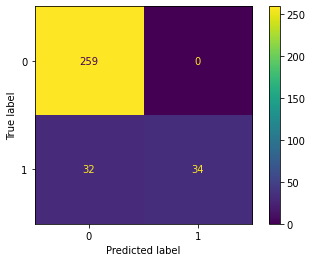

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
print(accuracy_score(y_test,y_pred)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))